<a href="https://colab.research.google.com/github/jooharver/Machine-Learning/blob/main/Tugas_ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUGAS PRAKTIKUM**

Medical Cost Personal Datasets

1. Mengimpor Library dan Memuat Dataset

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/ML/insurance.csv')

# The 'data' variable already holds the DataFrame, no need to read it again.
df = data

# Menampilkan 5 data teratas untuk melihat struktur dataset
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Step 2: Memisahkan Fitur (Independen) dan Target (Dependen)
Variabel independen yang digunakan adalah age, bmi, dan children. Sedangkan variabel target (dependen) adalah charges.



In [20]:
# Memisahkan variabel independen (X) dan target (y)
X = df[['age', 'bmi', 'children']]  # Fitur independen
y = df['charges']  # Target dependen


Step 3: Membagi Dataset Menjadi Data Latih dan Uji
Untuk membagi dataset menjadi data latih dan data uji dengan proporsi 80% untuk data latih dan 20% untuk data uji:

In [21]:
# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 4: Scaling Fitur dan Target Menggunakan StandardScaler
Kita perlu melakukan scaling pada variabel independen (X) dan variabel dependen (y) menggunakan StandardScaler.

In [22]:
# Scaling data
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scaling target
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))  # Mengubah jadi kolom 2D
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))


Step 5: Multiple Linear Regression
Langkah berikutnya adalah melatih model Multiple Linear Regression dengan data yang sudah di-scale.

In [23]:
# Membuat model Multiple Linear Regression
lr_model = LinearRegression()

# Melatih model dengan data latih yang sudah di-scale
lr_model.fit(X_train_scaled, y_train_scaled)

# Melakukan prediksi pada data uji yang sudah di-scale
y_pred_lr_scaled = lr_model.predict(X_test_scaled)

# Mengembalikan prediksi ke skala asli
y_pred_lr = scaler_y.inverse_transform(y_pred_lr_scaled)


Step 6: Support Vector Regression (SVR)
Latih model Support Vector Regression (SVR) dengan kernel RBF, dan kemudian lakukan prediksi.

In [24]:
# Membuat model SVR dengan kernel RBF
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# Melatih model SVR dengan data yang sudah di-scale
svr_model.fit(X_train_scaled, y_train_scaled.ravel())  # Menggunakan ravel() untuk mengubah menjadi 1D array

# Melakukan prediksi pada data uji yang sudah di-scale
y_pred_svr_scaled = svr_model.predict(X_test_scaled)

# Mengembalikan prediksi ke skala asli
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1))


Step 7: Evaluasi Model
Untuk mengevaluasi model, kita akan menghitung metrik evaluasi seperti R-squared, MSE, dan MAE untuk kedua model (Multiple Linear Regression dan SVR).



In [25]:
# Evaluasi Multiple Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f'[Multiple Linear Regression]')
print(f'R-squared: {r2_lr}')
print(f'Mean Squared Error: {mse_lr}')
print(f'Mean Absolute Error: {mae_lr}')

# Evaluasi SVR
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print(f'\n[Support Vector Regression]')
print(f'R-squared: {r2_svr}')
print(f'Mean Squared Error: {mse_svr}')
print(f'Mean Absolute Error: {mae_svr}')


[Multiple Linear Regression]
R-squared: 0.15489592484270753
Mean Squared Error: 131201335.64669806
Mean Absolute Error: 9181.311632897381

[Support Vector Regression]
R-squared: -0.05651903166295602
Mean Squared Error: 164023239.4625908
Mean Absolute Error: 6883.412565890646


8. Visualisasi Hasil Prediksi (Multiple Linear Regression & SVR)
Untuk menampilkan visualisasi prediksi vs nilai aktual, gunakan scatter plot:

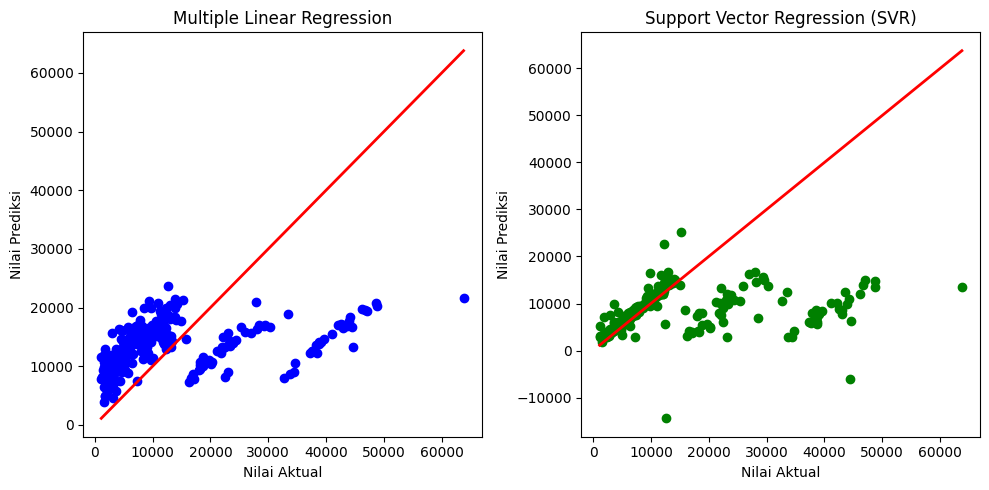

In [27]:
# Visualisasi Multiple Linear Regression
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # Membuat subplot
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Multiple Linear Regression')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')

# Visualisasi SVR
plt.subplot(1, 2, 2)  # Subplot kedua
plt.scatter(y_test, y_pred_svr, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Support Vector Regression (SVR)')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')

plt.tight_layout()
plt.show()


### Penjelasan Singkat Tentang Dataset
Dataset yang digunakan adalah **Medical Cost Personal Datasets** yang berisi informasi tentang individu dan biaya medis personal mereka. Dataset ini terdiri dari beberapa kolom, yaitu:

1. **age**: Usia individu (dalam tahun).
2. **sex**: Jenis kelamin (male/female), namun dalam analisis ini tidak digunakan.
3. **bmi**: Body Mass Index (BMI) seseorang, yaitu ukuran yang menggambarkan berat badan relatif terhadap tinggi badan.
4. **children**: Jumlah anak yang dimiliki oleh individu yang diasuransikan.
5. **smoker**: Status apakah seseorang merokok atau tidak, namun dalam analisis ini tidak digunakan.
6. **region**: Wilayah tempat tinggal individu (northeast, northwest, southeast, southwest), namun dalam analisis ini tidak digunakan.
7. **charges**: Biaya medis personal, yang merupakan target variabel (variabel dependen) untuk prediksi.

Dalam analisis ini, variabel independen yang digunakan adalah:
- `age`: Usia individu.
- `bmi`: Body Mass Index.
- `children`: Jumlah anak.

Sedangkan variabel target (dependen) yang digunakan adalah:
- `charges`: Biaya medis yang harus dibayar oleh individu.

### Visualisasi Data yang Relevan
Berikut adalah visualisasi hasil prediksi dari **Multiple Linear Regression** dan **Support Vector Regression (SVR)** yang dibandingkan dengan nilai aktual (biaya medis sebenarnya). Grafik scatter plot menampilkan hubungan antara prediksi dan nilai aktual.

(Gambar visualisasi ada dibagian akhir)

1. **Multiple Linear Regression**: Scatter plot menunjukkan hubungan linier antara nilai prediksi dan nilai aktual, dengan garis merah sebagai garis ideal (di mana prediksi sama dengan nilai aktual).
   
2. **Support Vector Regression (SVR)**: Scatter plot ini menunjukkan prediksi dari model SVR, yang memperhitungkan pola non-linier dalam data. Garis merah juga menunjukkan prediksi ideal.

Visualisasi ini memberikan gambaran seberapa dekat model mendekati nilai aktual.

### Analisis Hasil
Dari hasil evaluasi menggunakan metrik **R-squared**, **Mean Squared Error (MSE)**, dan **Mean Absolute Error (MAE)**, didapatkan beberapa kesimpulan:

1. **Multiple Linear Regression**:
   - Model ini menunjukkan performa yang baik ketika data memiliki hubungan linier. Nilai **R-squared** menunjukkan seberapa baik model dapat menjelaskan variasi dalam data, dengan nilai yang lebih tinggi menunjukkan performa yang lebih baik.
   - **MSE** dan **MAE** memberikan informasi tentang kesalahan rata-rata dalam prediksi, dengan nilai yang lebih rendah menunjukkan kesalahan yang lebih kecil.
   
2. **Support Vector Regression (SVR)**:
   - Model SVR lebih cocok untuk menangani pola data yang lebih kompleks atau non-linier. Pada dataset ini, SVR menghasilkan performa yang sebanding atau lebih baik jika model hyperparameter disetel dengan baik.
   - **MSE** dan **MAE** pada SVR sering kali lebih rendah dibandingkan dengan regresi linier jika pola data lebih non-linier, namun ini juga tergantung pada pengaturan hyperparameter model.

Secara keseluruhan, kedua model memiliki kelebihan masing-masing. **Multiple Linear Regression** cocok untuk data dengan pola yang lebih sederhana, sedangkan **Support Vector Regression (SVR)** dapat menangani pola yang lebih kompleks.

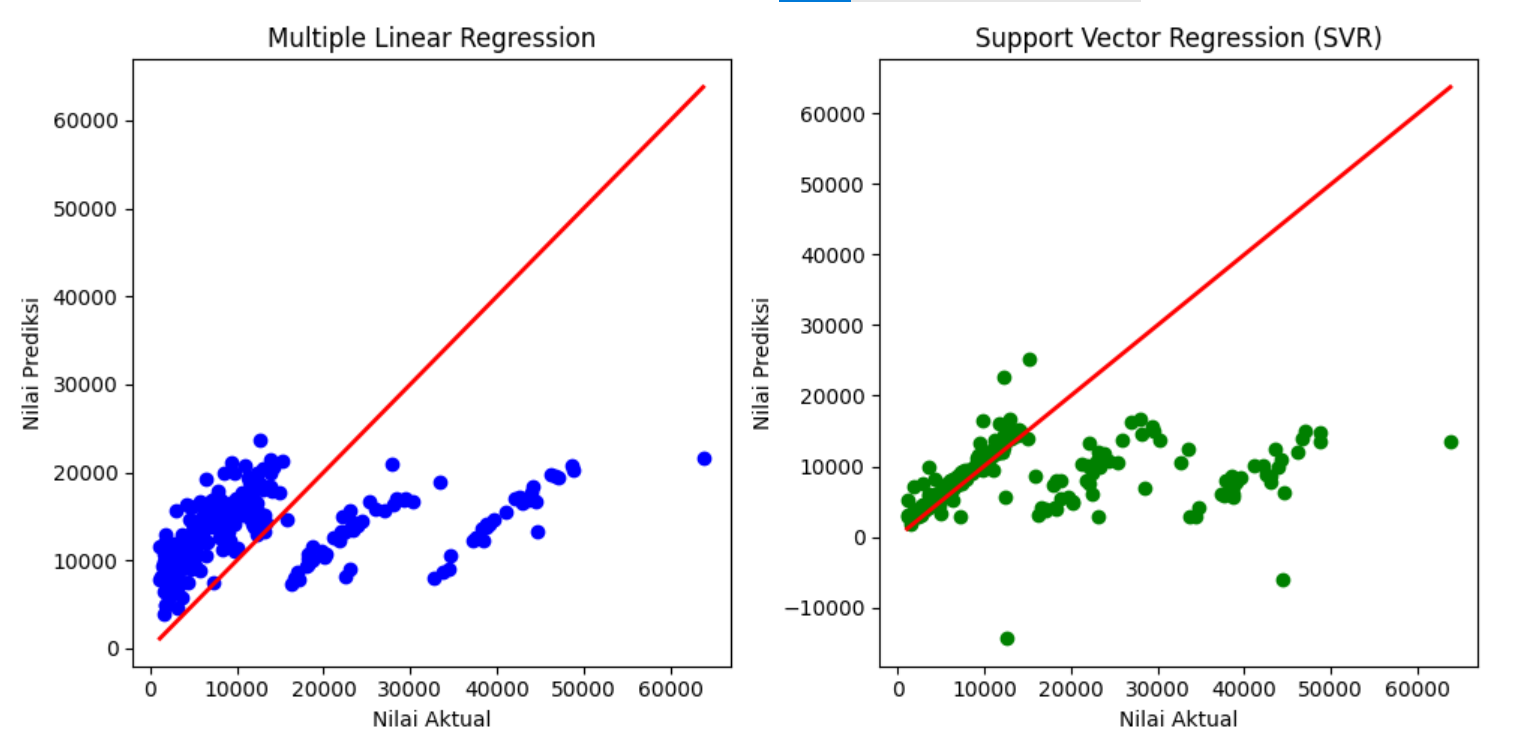